(mba_cover)

In [261]:
# Pacotes
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [262]:
# Carregar e visualizar dados
data = pd.read_csv('market_basket_final.csv')
data.info()
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Transacao  4000 non-null   int64  
 1   Item          4000 non-null   object 
 2   Valor_Item    4000 non-null   float64
 3   Data          4000 non-null   object 
 4   Hora          4000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 156.4+ KB
   ID_Transacao               Item  Valor_Item        Data      Hora
0             1   Prato Feito (PF)        28.0  2025-01-25  11:00:00
1             1  Coxinha de Frango        10.0  2025-01-25  11:00:00
2             1  Feijoada Completa        55.0  2025-01-25  11:00:00
3             2   Prato Feito (PF)        28.0  2025-01-03  21:00:00
4             2         Café Coado         6.0  2025-01-03  21:00:00


In [263]:
#Explorar dados

print(len(data['ID_Transacao'].unique()) , "transações únicas")
print(len(data['Item'].unique()) , "itens únicos")

1464 transações únicas
14 itens únicos


In [266]:
# Agrupa todos os itens de uma mesma transação em uma lista ou string
cesta_strings = data.groupby('ID_Transacao')['Item'] \
                   .apply(lambda x: ','.join(x)).reset_index()

cesta_strings.head()

,ID_Transacao,Item
0,1,"Prato Feito (PF),Coxinha de Frango,Feijoada Co..."
1,2,"Prato Feito (PF),Café Coado"
2,3,"Caipirinha de Limão,Pudim de Leite,Guaraná Ant..."
3,4,"Prato Feito (PF),Pão de Queijo (Porção),Moquec..."
4,5,"Pudim de Leite,Café Coado,Caipirinha de Limão"


In [267]:
# Transforma strings em listas
groceries = cesta_strings['Item'].apply(lambda t: t.split(','))
print(groceries.head())


0    [Prato Feito (PF), Coxinha de Frango, Feijoada...
1                       [Prato Feito (PF), Café Coado]
2    [Caipirinha de Limão, Pudim de Leite, Guaraná ...
3    [Prato Feito (PF), Pão de Queijo (Porção), Moq...
4    [Pudim de Leite, Café Coado, Caipirinha de Limão]
Name: Item, dtype: object


In [269]:
# Transforma em uma lista de lists
groceries = list(groceries)
print(groceries[:5])  # Exibe as primeiras 5 transações

[['Prato Feito (PF)', 'Coxinha de Frango', 'Feijoada Completa'], ['Prato Feito (PF)', 'Café Coado'], ['Caipirinha de Limão', 'Pudim de Leite', 'Guaraná Antarctica', 'Feijoada Completa'], ['Prato Feito (PF)', 'Pão de Queijo (Porção)', 'Moqueca de Peixe', 'Pudim de Leite'], ['Pudim de Leite', 'Café Coado', 'Caipirinha de Limão']]


In [270]:
# Transforma a lista groceries em One-hot
encoder = TransactionEncoder()
onehot = encoder.fit(groceries).transform(groceries)

# Converte one-hot em DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
print(onehot.head())

   Arroz Carreteiro  Brigadeiro Gourmet  Café Coado  Caipirinha de Limão  \
0             False               False       False                False   
1             False               False        True                False   
2             False               False       False                 True   
3             False               False       False                False   
4             False               False        True                 True   

   Cerveja Artesanal  Coxinha de Frango  Feijoada Completa  \
0              False               True               True   
1              False              False              False   
2              False              False               True   
3              False              False              False   
4              False              False              False   

   Guaraná Antarctica  Moqueca de Peixe  Prato Feito (PF)  Pudim de Leite  \
0               False             False              True           False   
1               

In [271]:
# Implementar Apriori
# Gerar frequent itemsets

frequent_itemsets = apriori(onehot, min_support = 0.01,
max_len = 2, use_colnames = True)

# Exibir o número de frequent itemsets encontrados
print(len(frequent_itemsets), "frequent itemsets que aparecem em pelo menos 1% das transações")

# Exibir os primeiros frequent itemsets
print(frequent_itemsets.head())

99 frequent itemsets que aparecem em pelo menos 1% das transações
    support               itemsets
0  0.138661     (Arroz Carreteiro)
1  0.127049   (Brigadeiro Gourmet)
2  0.133197           (Café Coado)
3  0.325820  (Caipirinha de Limão)
4  0.144126    (Cerveja Artesanal)


In [272]:
# Gerar regras de associação
rules = association_rules(frequent_itemsets,
                        metric = "support",
                        min_threshold = 0.01)
print(len(rules),"regras aparecem em pelo menos 1% das transações")

# Exibir as regras de associação
print(rules[['antecedents','consequents','support','confidence','lift']].head(15))

170 regras aparecem em pelo menos 1% das transações
              antecedents            consequents   support  confidence  \
0      (Arroz Carreteiro)   (Brigadeiro Gourmet)  0.017077    0.123153   
1    (Brigadeiro Gourmet)     (Arroz Carreteiro)  0.017077    0.134409   
2            (Café Coado)     (Arroz Carreteiro)  0.012295    0.092308   
3      (Arroz Carreteiro)           (Café Coado)  0.012295    0.088670   
4   (Caipirinha de Limão)     (Arroz Carreteiro)  0.037568    0.115304   
5      (Arroz Carreteiro)  (Caipirinha de Limão)  0.037568    0.270936   
6     (Cerveja Artesanal)     (Arroz Carreteiro)  0.011612    0.080569   
7      (Arroz Carreteiro)    (Cerveja Artesanal)  0.011612    0.083744   
8     (Coxinha de Frango)     (Arroz Carreteiro)  0.015027    0.118280   
9      (Arroz Carreteiro)    (Coxinha de Frango)  0.015027    0.108374   
10    (Feijoada Completa)     (Arroz Carreteiro)  0.038251    0.102941   
11     (Arroz Carreteiro)    (Feijoada Completa)  0.038251  

In [297]:
# Filtrar regras relevantes
rules_filtered = rules[
    (rules['lift'] >= 1) &
    (rules['confidence'] >= 0.3)
]

print(len(rules_filtered), "regras após filtragem")

9 regras após filtragem


In [298]:
# Ordenar pelo lift (mais forte primeiro)
top_rules = rules_filtered.sort_values(by='lift', ascending=False).head(15)

# Exibir as top 10 regras
print(top_rules[['antecedents','consequents','support','confidence','lift']])

               antecedents            consequents   support  confidence  \
66   (Caipirinha de Limão)    (Feijoada Completa)  0.233607    0.716981   
67     (Feijoada Completa)  (Caipirinha de Limão)  0.233607    0.628676   
151     (Prato Feito (PF))       (Pudim de Leite)  0.193989    0.536862   
150       (Pudim de Leite)     (Prato Feito (PF))  0.193989    0.663551   
82     (Cerveja Artesanal)    (Feijoada Completa)  0.059426    0.412322   
63     (Cerveja Artesanal)  (Caipirinha de Limão)  0.048497    0.336493   
116     (Moqueca de Peixe)    (Feijoada Completa)  0.056011    0.377880   
33    (Brigadeiro Gourmet)    (Feijoada Completa)  0.047814    0.376344   
45            (Café Coado)  (Caipirinha de Limão)  0.043716    0.328205   

         lift  
66   1.929523  
67   1.929523  
151  1.836369  
150  1.836369  
82   1.109632  
63   1.032758  
116  1.016942  
33   1.012808  
45   1.007321  


In [299]:
#Gerando um heatmap de correlações entre os itens

# Criar colunas legíveis
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(x))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(x))


# Conferir
print(top_rules.head(1))

              antecedents          consequents  antecedent support  \
66  (Caipirinha de Limão)  (Feijoada Completa)             0.32582   

    consequent support   support  confidence      lift  representativity  \
66            0.371585  0.233607    0.716981  1.929523               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  \
66  0.112537    2.220401       0.714552  0.503682   0.549631    0.672829   

        antecedents_str    consequents_str  
66  Caipirinha de Limão  Feijoada Completa  


antecedents_str      Brigadeiro Gourmet  Café Coado  Caipirinha de Limão  \
consequents_str                                                            
Caipirinha de Limão                 NaN    0.328205                  NaN   
Feijoada Completa              0.376344         NaN             0.716981   
Prato Feito (PF)                    NaN         NaN                  NaN   
Pudim de Leite                      NaN         NaN                  NaN   

antecedents_str      Cerveja Artesanal  Feijoada Completa  Moqueca de Peixe  \
consequents_str                                                               
Caipirinha de Limão           0.336493           0.628676               NaN   
Feijoada Completa             0.412322                NaN           0.37788   
Prato Feito (PF)                   NaN                NaN               NaN   
Pudim de Leite                     NaN                NaN               NaN   

antecedents_str      Prato Feito (PF)  Pudim de Leite  
consequents_

Text(50.72222222222221, 0.5, 'Consequentes')

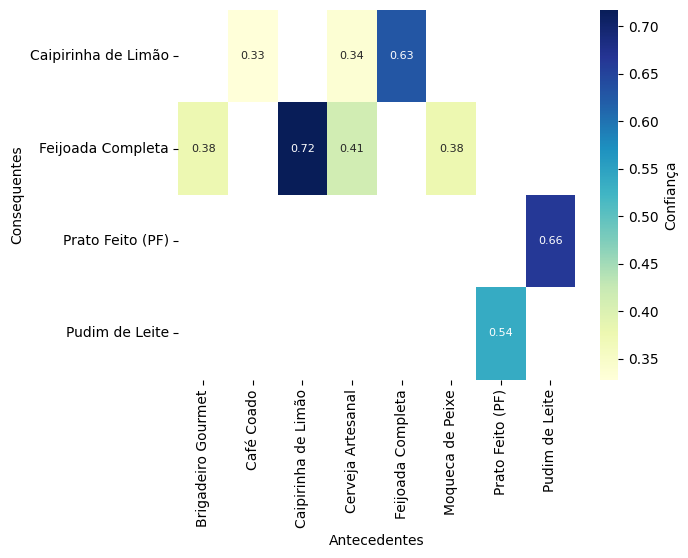

In [303]:
#Pivotar para criar matriz
support_table = top_rules.pivot(index='consequents_str', 
                                columns='antecedents_str', 
                                values='confidence')


print(support_table)

sns.heatmap(support_table, 
            annot=True,
            annot_kws={"size": 8},
            cmap='YlGnBu',
            cbar_kws={'label': 'Confiança'})


plt.xlabel("Antecedentes")
plt.ylabel("Consequentes")

# **Métricas utilizadas**

**Support** → quão frequente é o combo no total das transações

Ex.: 0.113 = 11,3% de todas as compras

**Confidence** → probabilidade de levar o consequente dado que levou o antecedente

Ex.: Coxinha → Guaraná = 0.60
60% das pessoas que compram coxinha levam guaraná

**Lift** → quanto estatisticamente essa associação é maior do que o acaso

> 1 → associação real
> 3 → muito forte
> 4 → comportamento quase “padrão”
___

## Interpretação e sugestões

**Regra 1**

*Interpretação*

Caipirinha de Limão → Feijoada Completa
support = 0.2336
confidence = 0.717
lift = 1.93

- ~23% de TODAS as transações têm os dois itens
- Quem compra caipirinha, em ~72% dos casos também compra feijoada
- A associação é quase 2x maior que o acaso

*Insight acionável*

- Caipirinha funciona como gatilho de upsell para feijoada
- Ótimo combo sugerido pelo garçom
- Cardápio pode destacar essa harmonização

**Regra 2**

*Interpretação*

Prato Feito (PF) → Pudim de Leite
support = 0.193989
confidence = 0.54
lift = 1.84

- ~19% de TODAS as transações têm os dois itens
- Quem compra PF, em ~54% dos casos também compra Pudim de Leite
- A associação é quase 2x maior que o acaso
- Cliente de PF tem alta propensão a sobremesa simples
- É um padrão de refeição cotidiana, não gourmet

*Insight acionável*

- Sobremesa pode ser sugerida automaticamente ou em combo
- Excelente para aumentar ticket médio com baixo atrito
